<a href="https://colab.research.google.com/github/rhiats/titanicPrediction/blob/main/titanicPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic - Machine Learning from Disaster**

References:

https://www.kaggle.com/competitions/titanic/data

https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca

https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

https://anelmusic13.medium.com/how-to-score-top-3-in-kaggles-titanic-machine-learning-from-disaster-competition-13d056e262b1


The Titanic dataset contains 891 passengers and it is balanced with 40% of the passengers surviving the catastrophe. The dataset is skewed towards males, with 80% of the data composed of male passengers. There were more males included in this Titanic dataset than females, but it is unclear whether there were more males on the ship than females. Most of the data is categorical, with the only continuous data included being Age and Fare.

Only three of the columns are missing values. The three columns are Ages, Cabin, and Embarked. There are 177 passengers missing Ages, 687 missing Cabin numbers, and 2 missing from Embarked.

Preliminary analysis showed that it is more likely that a female survives the crash than a male, while it equally likely that an adult and child survive the crash. An adult is considered a person older than 16 years of age. Both children and adults have a 40% chance of surviving the incident. Age is not included as a feature for the model. Families with 4 or more children/parents had a higher chance of dying in the crash. Similarly, families with 3 of more siblings had an increased chance of dying during the crash, so these factors are considered in the analysis.

Two potential models that could be used to predict the survival of a passenger on the Titanic are **Multi-variable Logistic Regression** and a **Decision Tree Classifier**. They are both simple models that can be highly effective on small datasets. Continuous predictors work best for Logistic Regression models, while categorical data is beneficial for a Decision Tree classifier, so the selected features are categorized for the analytics.

The models are evaluated using **Mean Squared Error (MSE)**, which is the average squared difference between the predicted and actual values. A lower value indicate better performance of the model.

There are **three next steps** that may improve the analysis of this dataset.


1.   Balance by sex of the passenger
2.   Impute the ages of the missing passengers






In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Exploring the Training Set**

In [2]:
def duplicates(df,cols_lst):
  """
    Return df of duplicate rows across specified across columns
    https://www.statology.org/pandas-find-duplicates/

    @p:
    df (df): dataframe containing rows and columns (not empty)
    cols (list): list of columns to ck for duplicates

    @r:
    dups_df (df): Dataframe containing the duplicate rows
  """

  return df[df.duplicated(cols_lst)]

In [3]:
X=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/input/train.csv")
y=X.Survived
X.drop(['Name', 'Ticket', 'Cabin','Embarked'], axis=1,inplace=True)
dupPassengers_df=duplicates(X,['PassengerId'])

In [4]:
print(X.head())
print("The are {} duplicated passengers in the dataset".format(int(dupPassengers_df.shape[0])))
print("The are {} passengers in the dataset".format(int(X.shape[0])))

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500
The are 0 duplicated passengers in the dataset
The are 891 passengers in the dataset


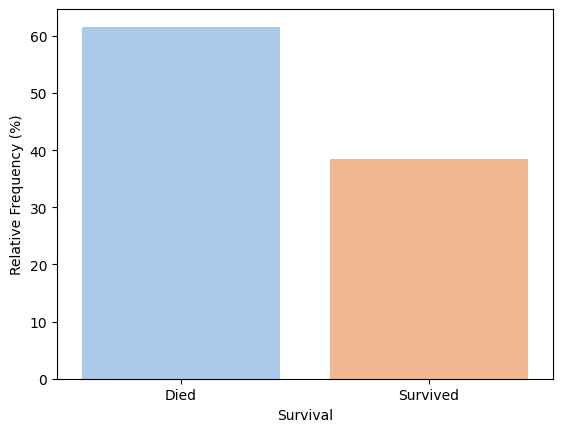

In [5]:
def balanced(df):
  """
    Percentage of passengers who survive v. not survive in the dataset
    Balanced or Imbalanced Data

    @p:
      df (dataframe): Input dataframe
  """
  df['Survival'] = np.where(df['Survived']==0, 'Died', 'Survived')

  survival_ratio_df=(df[['Survival', 'PassengerId']].groupby('Survival').count()/int(df.shape[0]))*100

  survival_ratio_df.reset_index(inplace=True)

  survival_ratio_df.rename(columns={"PassengerId": "Relative Frequency (%)"}, inplace=True)

  sns.barplot(data=survival_ratio_df, x='Survival', y="Relative Frequency (%)", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/balanced.png")

balanced(X)

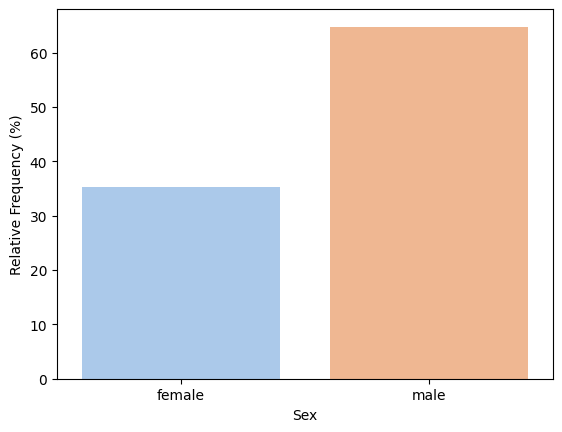

In [6]:
def balanced_sex(df):
  """
    Percentage of passengers by sex
    Balanced or Imbalanced Data

    @p:
      df (dataframe): Input dataframe
  """

  sex_ratio_df=(df[['Sex', 'PassengerId']].groupby('Sex').count()/int(df.shape[0]))*100

  sex_ratio_df.reset_index(inplace=True)

  sex_ratio_df.rename(columns={"PassengerId": "Relative Frequency (%)"}, inplace=True)

  sns.barplot(data=sex_ratio_df, x='Sex', y="Relative Frequency (%)", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/balanced_sex.png")

balanced_sex(X)

In [7]:
def nan_num(df):
  """
    Return the number of nans per column in the data set.

  """
  nan_count=df.isna().sum()
  return nan_count
nan_num(X)

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Survival         0
dtype: int64

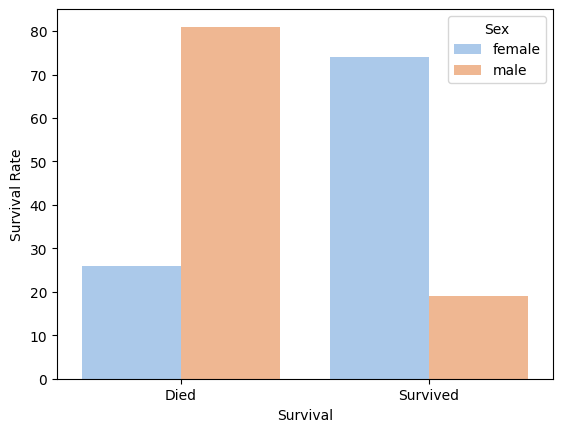

In [8]:
def sex_survival(df):
  """
    Probability Females Survived v. Males survive (Conditional Probability)

    @p:
      df (dataframe): Input dataframe
  """
  df['Survival'] = np.where(df['Survived']==0, 'Died', 'Survived')

  survival_sx_df=df[['Survival', 'Sex', 'PassengerId']].groupby(['Sex','Survival']).count()

  survival_sx_df.reset_index(inplace=True)

  survival_sx_df.rename(columns={"PassengerId": "Count Survived"}, inplace=True)

  sx_df=df[['Sex', 'PassengerId']].groupby(['Sex']).count()

  sx_df.reset_index(inplace=True)

  sx_df.rename(columns={"PassengerId": "Count"}, inplace=True)

  sx_survival_df=pd.merge(survival_sx_df,sx_df,on="Sex")

  sx_survival_df["Survival Rate"]=round((sx_survival_df["Count Survived"]/sx_survival_df["Count"])*100,0)

  sns.barplot(data=sx_survival_df, x="Survival", y="Survival Rate", hue="Sex", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/sex_survival_rate.png")

sex_survival(X)


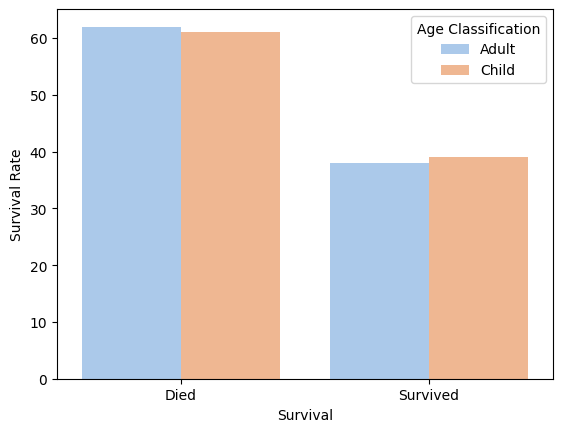

In [9]:
def age_survival(df):
  """
    Probability Adults (Age 16) survive the Titanic crash (Conditional Probability)

    @p:
      df (dataframe): Input dataframe
  """
  df['Survival'] = np.where(df['Survived']==0, 'Died', 'Survived')

  df['Age Classification']=np.where((df['Age']>16), "Adult", "Child")

  survival_age_df=df[['Survival', 'Age Classification', 'PassengerId']].groupby(['Age Classification','Survival']).count()

  survival_age_df.reset_index(inplace=True)

  survival_age_df.rename(columns={"PassengerId": "Count Survived"}, inplace=True)

  age_df=df[['Age Classification', 'PassengerId']].groupby(['Age Classification']).count()

  age_df.reset_index(inplace=True)

  age_df.rename(columns={"PassengerId": "Count"}, inplace=True)

  age_survival_df=pd.merge(survival_age_df,age_df,on="Age Classification")

  age_survival_df["Survival Rate"]=round((age_survival_df["Count Survived"]/age_survival_df["Count"])*100,0)

  sns.barplot(data=age_survival_df, x="Survival", y="Survival Rate", hue="Age Classification", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/adult_survival_rate.png")

age_survival(X)

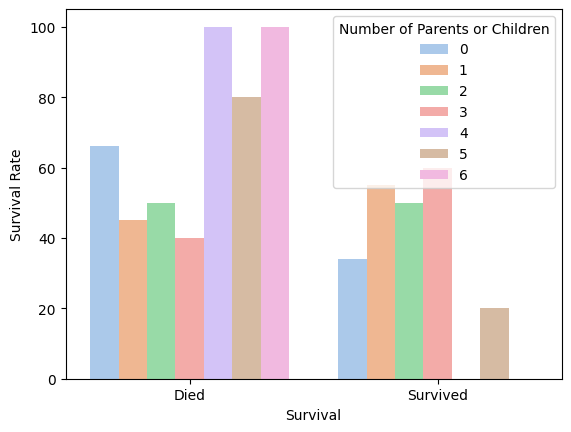

In [10]:
def par_survival(df):
  """
    Probability number of parents influence survival (Conditional Probability)

    @p:
      df (dataframe): Input dataframe
  """
  df['Survival'] = np.where(df['Survived']==0, 'Died', 'Survived')

  df.rename(columns={"Parch": "Number of Parents or Children"}, inplace=True)

  survival_par_df=df[['Survival', 'Number of Parents or Children', 'PassengerId']].groupby(['Number of Parents or Children','Survival']).count()

  survival_par_df.reset_index(inplace=True)

  survival_par_df.rename(columns={"PassengerId": "Count Survived"}, inplace=True)

  par_df=df[['Number of Parents or Children', 'PassengerId']].groupby(['Number of Parents or Children']).count()

  par_df.reset_index(inplace=True)

  par_df.rename(columns={"PassengerId": "Count"}, inplace=True)

  par_survival_df=pd.merge(survival_par_df,par_df,on="Number of Parents or Children")

  par_survival_df["Survival Rate"]=round((par_survival_df["Count Survived"]/par_survival_df["Count"])*100,0)

  sns.barplot(data=par_survival_df, x="Survival", y="Survival Rate", hue="Number of Parents or Children", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/par_survival_rate.png")

par_survival(X)
#Does number of siblings influence survival
#Distribution of fares - t-test

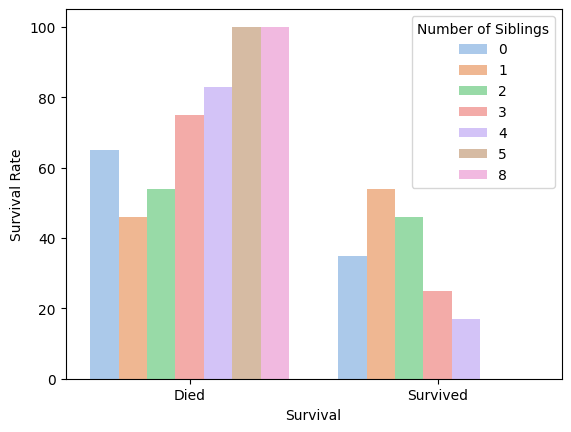

In [12]:
def sib_survival(df):
  """
    Probability siblings influence survival (Conditional Probability)

    @p:
      df (dataframe): Input dataframe
  """
  df['Survival'] = np.where(df['Survived']==0, 'Died', 'Survived')

  df.rename(columns={"SibSp": "Number of Siblings"}, inplace=True)

  survival_sib_df=df[['Survival', 'Number of Siblings', 'PassengerId']].groupby(['Number of Siblings','Survival']).count()

  survival_sib_df.reset_index(inplace=True)

  survival_sib_df.rename(columns={"PassengerId": "Count Survived"}, inplace=True)

  sib_df=df[['Number of Siblings', 'PassengerId']].groupby(['Number of Siblings']).count()

  sib_df.reset_index(inplace=True)

  sib_df.rename(columns={"PassengerId": "Count"}, inplace=True)

  sib_survival_df=pd.merge(survival_sib_df,sib_df,on="Number of Siblings")

  sib_survival_df["Survival Rate"]=round((sib_survival_df["Count Survived"]/sib_survival_df["Count"])*100,0)

  sns.barplot(data=sib_survival_df, x="Survival", y="Survival Rate", hue="Number of Siblings", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/sib_survival_rate.png")

sib_survival(X)

In [ ]:
#Distribution of fares - t-test

**Logistic Regression Model (Train, Predict, Evaluate)**

**Feature Importance of Logistic Regression Model**

https://forecastegy.com/posts/feature-importance-in-logistic-regression/

**Decision Tree Model (Train, Predict, Validate)**

https://samanemami.medium.com/evaluate-the-decision-regressor-tree-d8394d753ae7#:~:text=The%20performance%20of%20a%20decision,Lower%20values%20indicate%20better%20performance.

**Feature Importance of Decision Tree**

https://samanemami.medium.com/evaluate-the-decision-regressor-tree-d8394d753ae7#:~:text=The%20performance%20of%20a%20decision,Lower%20values%20indicate%20better%20performance.

**Decision Tree Visualization**

https://samanemami.medium.com/evaluate-the-decision-regressor-tree-d8394d753ae7#:~:text=The%20performance%20of%20a%20decision,Lower%20values%20indicate%20better%20performance.

**Decision Tree Pruning**

https://samanemami.medium.com/evaluate-the-decision-regressor-tree-d8394d753ae7#:~:text=The%20performance%20of%20a%20decision,Lower%20values%20indicate%20better%20performance.